In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display as ds
import matplotlib.image as mpimg
from skimage import util, img_as_float, img_as_int
import cv2

%matplotlib inline

In [2]:
class Dataset:
    main = 'dataset/UCSD_Anomaly_Dataset.v1p2'
    trainpath = "{}/UCSDped1/Train/Train034".format(main)
    testpath = "{}/UCSDped1/Test/Test034".format(main)
    

In [3]:
#%%bash -s $Dataset.testpath
#ls $1/

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles = ["{}/{}".format(Dataset.trainpath, f) for f in listdir(Dataset.trainpath) ]
testfiles = ["{}/{}".format(Dataset.testpath, f) for f in listdir(Dataset.testpath) ]
print(len(onlyfiles), len(testfiles))

200 200


In [5]:
images = []
for f in onlyfiles:
    image = cv2.imread(f)
    image_norm = img_as_float(image)
    images.append(image_norm)
train_images = images#[15:25]
train_images = np.array(train_images)

In [6]:
images = []
for f in testfiles:
    image = cv2.imread(f)
    image_norm = img_as_float(image)
    images.append(image_norm)
    images.append(image_norm)
test_images = images#[15:25]
test_images = np.array(test_images)

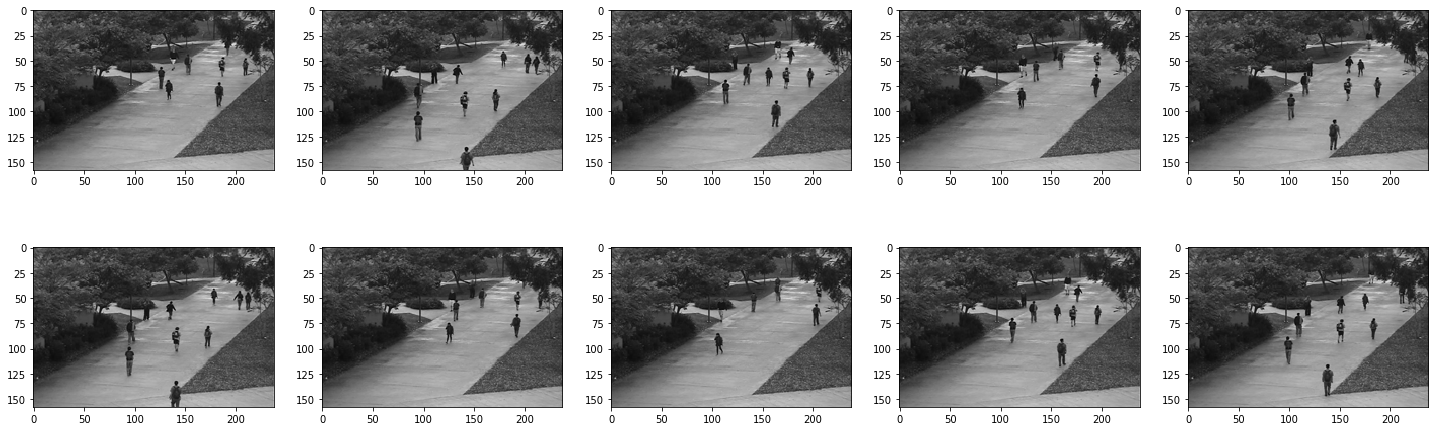

In [7]:
fig, axs = plt.subplots(2,5, figsize=(25, 8))
axs = axs.ravel()

for i, imgs in enumerate(train_images[15:25]):
    axs[i].imshow(imgs[:,:,:])
    
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [8]:
train_images.shape

(200, 158, 238, 3)

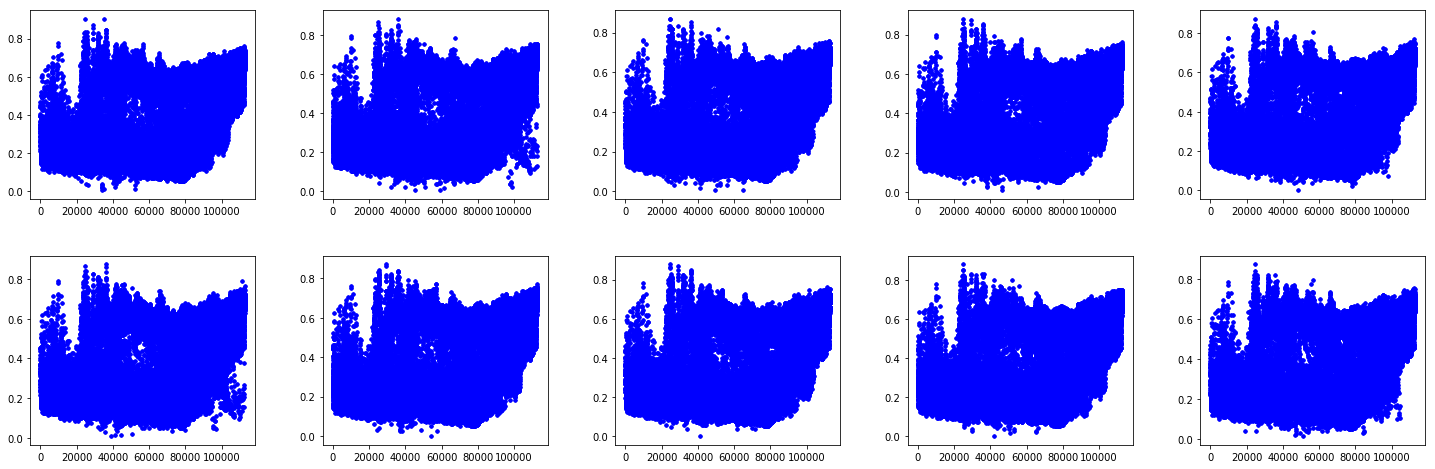

In [9]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, imgs in enumerate(train_images[15:25]):
    axs[i].plot(imgs.ravel(), 'b.')


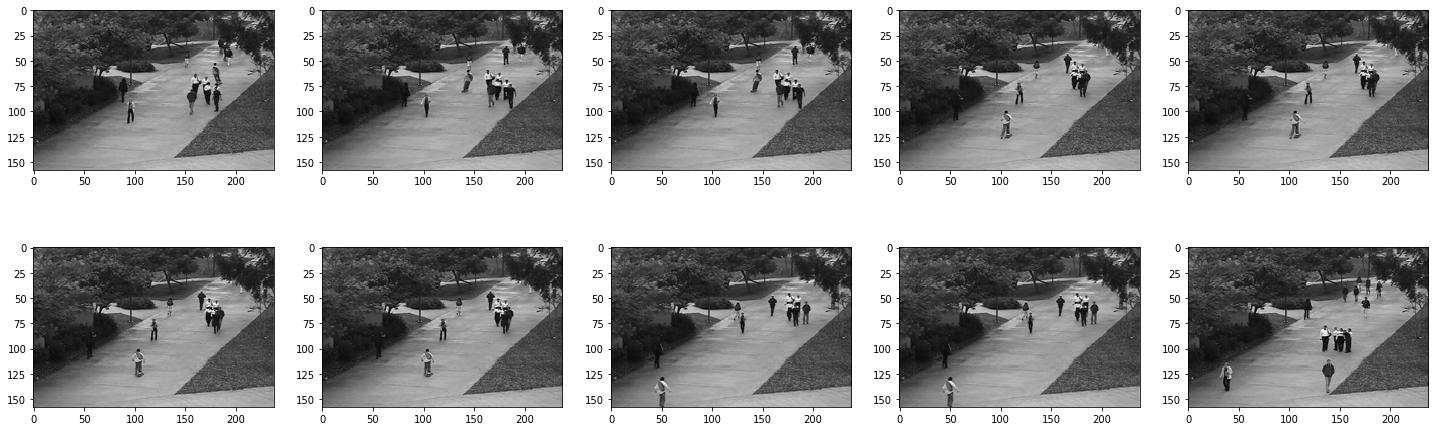

In [10]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
axs = axs.ravel()

for i, imgs in enumerate(test_images[15:25]):
    axs[i].imshow(imgs[:,:,:])

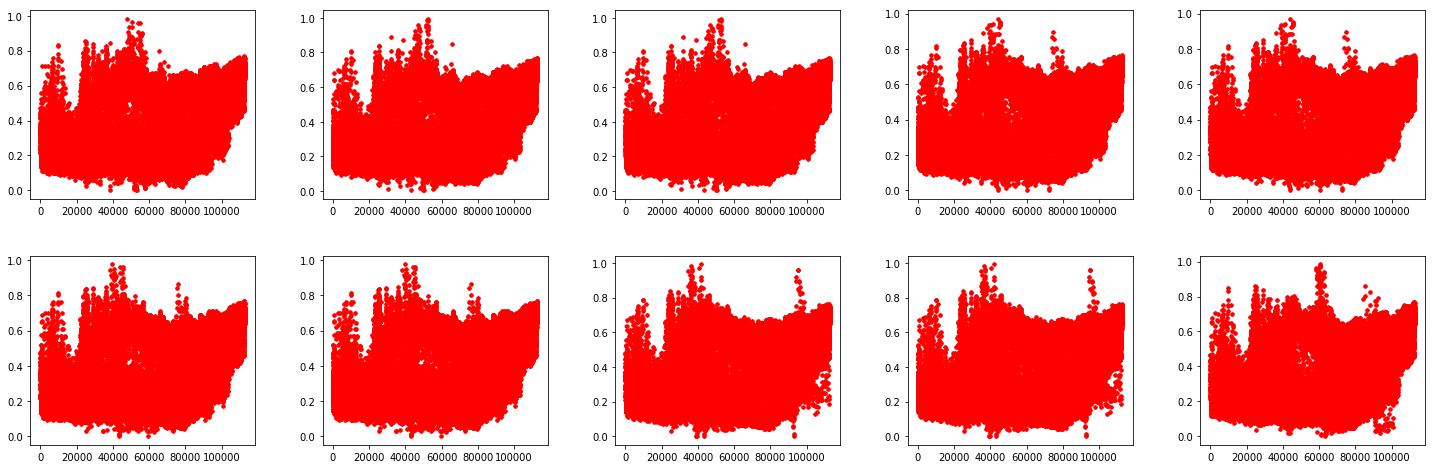

In [11]:
fig, axs = plt.subplots(2,5, figsize=(25, 8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, imgs in enumerate(test_images[15:25]):
    axs[i].plot(imgs.ravel(), 'r.')

Adding noise to images

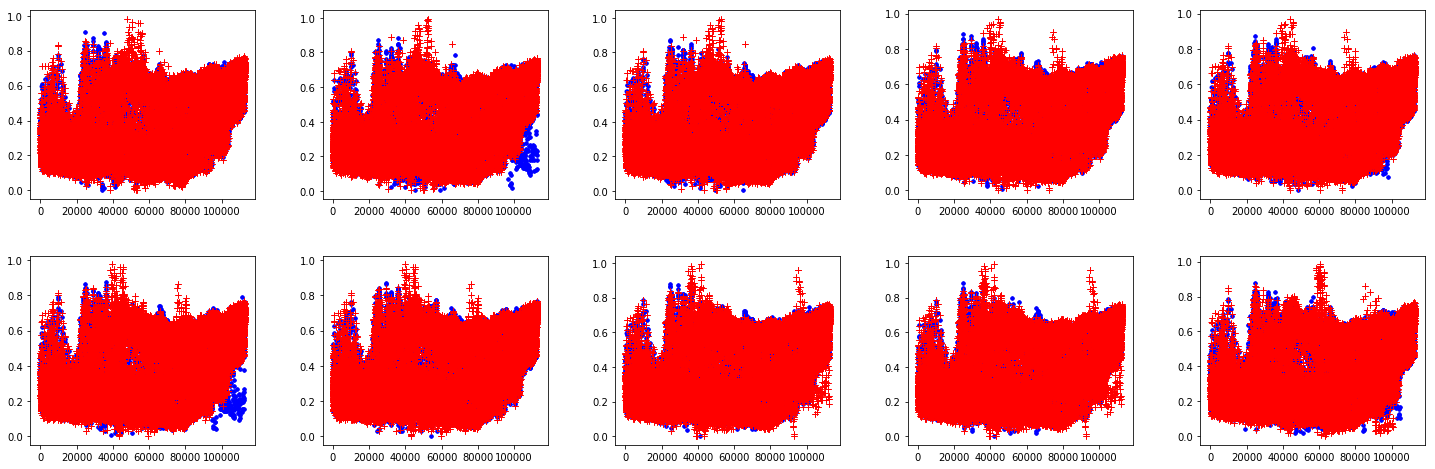

In [12]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, (imgs_tr, imgs_te) in enumerate(zip(train_images[15:25], test_images[15:25])):
    axs[i].plot(imgs_tr.ravel(), 'b.')
    axs[i].plot(imgs_te.ravel(), 'r+')
    

In [13]:
train_images_ = []
for image in train_images:
    train_images_.append(util.noise.random_noise(image))
    
test_images_ = []
for image in test_images:
    test_images_.append(util.noise.random_noise(image))
    

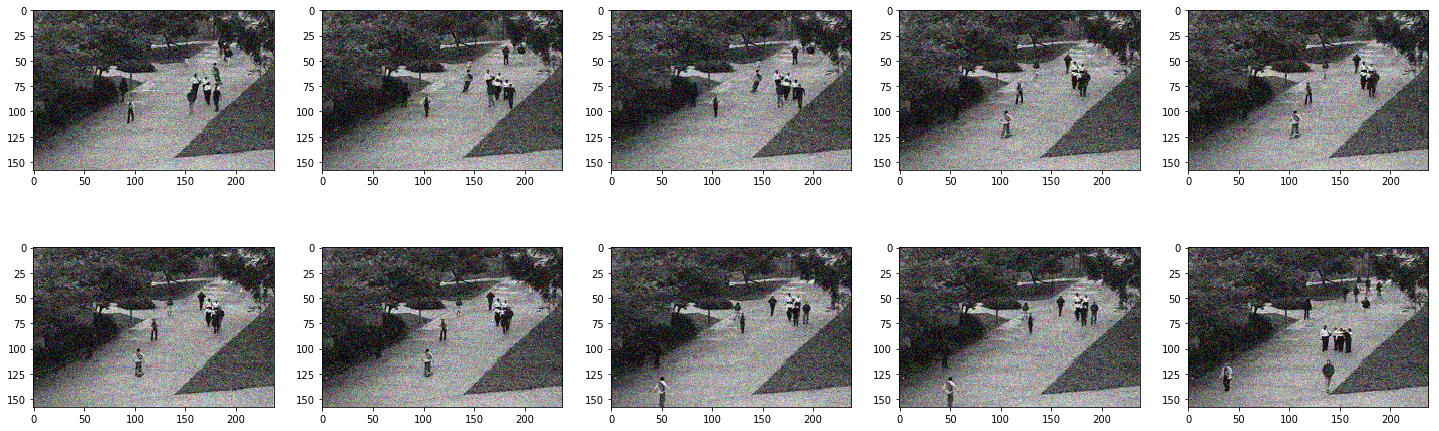

In [14]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
axs = axs.ravel()

for i, imgs in enumerate(test_images_[15:25]):
    axs[i].imshow(imgs[:,:,:])

In [15]:
np.save('{}/train'.format(Dataset.main),train_images)
np.save('{}/train_'.format(Dataset.main),train_images_)

np.save('{}/test'.format(Dataset.main),test_images)
np.save('{}/test_'.format(Dataset.main),test_images_)

array([[[0.29127139, 0.41368822, 0.36445242],
        [0.37913522, 0.41231839, 0.33056418],
        [0.49100961, 0.35251009, 0.52932489],
        ...,
        [0.18864332, 0.20527081, 0.40590577],
        [0.07855809, 0.16209853, 0.14755041],
        [0.24118484, 0.18155108, 0.32401742]],

       [[0.17392713, 0.49881605, 0.24568252],
        [0.27469808, 0.35314442, 0.36059598],
        [0.38510939, 0.33677904, 0.35665236],
        ...,
        [0.22114827, 0.38664392, 0.22618758],
        [0.32507513, 0.        , 0.12778793],
        [0.47611432, 0.37728997, 0.2818106 ]],

       [[0.48733239, 0.13332344, 0.18107198],
        [0.40227929, 0.24350305, 0.24095168],
        [0.40722234, 0.22525014, 0.22497692],
        ...,
        [0.35556476, 0.41038194, 0.28198979],
        [0.04126505, 0.1481558 , 0.15755532],
        [0.32487877, 0.08288343, 0.1867519 ]],

       ...,

       [[0.29993363, 0.55283829, 0.33136999],
        [0.40925082, 0.51414028, 0.24875447],
        [0.24607194, 0